# 🌌 Gravitational Dynamics: Analyzing Kepler’s Third Law 🌌

---

## 🎯 Objective
This notebook investigates the relationship between orbital period and radius through Kepler’s Third Law for circular orbits. It includes a derivation, computational simulation, and analysis of real-world astronomical data. 

---

## 🚀 Derivation: Establishing Kepler’s Third Law
For a body in a circular orbit, the gravitational force balances the centripetal force required for circular motion:

- **Gravitational Force**: $F_g = \frac{G M m}{r^2}$
- **Centripetal Force**: $F_c = \frac{m v^2}{r}$

Equating these forces:  
$$ \frac{G M m}{r^2} = \frac{m v^2}{r} $$  
Cancel $m$ (mass of the orbiting body) and simplify:  
$$ v^2 = \frac{G M}{r} $$

The orbital velocity is $v = \frac{2\pi r}{T}$, where $T$ is the orbital period. Substituting:  
$$ \left(\frac{2\pi r}{T}\right)^2 = \frac{G M}{r} $$  
$$ \frac{4\pi^2 r^2}{T^2} = \frac{G M}{r} $$  
Rearrange by multiplying both sides by $T^2$ and dividing by $r$:  
$$ T^2 = \frac{4\pi^2}{G M} r^3 $$  

This yields $T^2 \propto r^3$, demonstrating that the square of the orbital period is proportional to the cube of the orbital radius, a cornerstone of Kepler’s Third Law.

---

## 🌍 Astronomical Significance
Kepler’s Third Law has profound implications:
1. **Mass Determination**: Using $T$ and $r$, the central body’s mass $M$ can be calculated (e.g., Earth’s mass from the Moon’s orbit).
2. **Distance Measurement**: Orbital periods of planets provide their distances from the Sun.
3. **Orbital Engineering**: This relationship informs the design of satellite trajectories, such as those for navigation systems.

---

## 📊 Computational Analysis
This section implements a simulation to verify Kepler’s Third Law using real-world data and visualizations.

---

### Step 1: Orbital Data
This step presents the orbital parameters for the Moon and select Solar System planets, including their central masses, orbital radii, and periods. The Moon orbits Earth, while Earth, Mars, and Jupiter orbit the Sun, providing a range of scales to test Kepler’s Third Law. The data will serve as the foundation for verifying the $T^2 \propto r^3$ relationship in subsequent steps.

---

### Step 2: Circular Orbit Visualization 🎬
To illustrate the dynamics of a circular orbit, an animated simulation of the Moon’s orbit around Earth is generated. The Moon’s orbital radius of 384,400 km is scaled for visualization, with Earth positioned at the origin. This animation highlights the uniform motion characteristic of a circular orbit, providing a visual representation of the period $T$ and radius $r$ used in Kepler’s Third Law.

---

### Step 3: $T^2$ vs $r^3$ Verification
A graphical representation confirms the $T^2 \propto r^3$ relationship by plotting $T^2$ against $r^3$ for the Moon and planets. This visualization validates Kepler’s Third Law across different orbital scales, from the Moon’s orbit araound Earth to Jupiter’s orbit around the Sun.

---

## 🌠 Extension to Elliptical Orbits
For elliptical orbits, Kepler’s Third Law applies with $r$ representing the semi-major axis. This generalization extends its utility to diverse celestial phenomena, including comets and exoplanets.

---

## 🎨 Summary
This notebook integrates derivation, simulation, and visualization to elucidate Kepler’s Third Law.


---

In [1]:
# Cell 1: Dependency Check
try:
    import numpy
    import pandas
    import plotly
    from IPython.display import display, HTML
    display(HTML("<h3 style='color: #2ECC71;'>✅ All Required Libraries Installed</h3>"))
except ImportError as e:
    display(HTML("<h3 style='color: #FF5733;'>❌ Missing Library: " + str(e) + "</h3>"))
    display(HTML("<p>Please install the missing library using: <code>pip install " + str(e).split("'")[1] + "</code></p>"))

# Cell 2: Setup with Style
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display, HTML

# Set the Plotly renderer for Jupyter (ensures plots display locally)
pio.renderers.default = "notebook_connected"

display(HTML("<h2 style='color: #FF5733; text-align: center;'>✨ Libraries Initialized for Analysis ✨</h2>"))

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M_earth = 5.972e24  # Earth mass (kg)
M_sun = 1.989e30  # Sun mass (kg)

# Cell 3: Real-World Data (Updated for Full Visibility)
data = pd.DataFrame({
    'Body': ['Moon', 'Earth', 'Mars', 'Jupiter'],
    'Central Mass (kg)': [M_earth, M_sun, M_sun, M_sun],
    'Radius (m)': [384400000, 149.6e9, 227.9e9, 778.5e9],  # Orbital radius
    'Period (s)': [27.32*86400, 365.25*86400, 687*86400, 4333*86400]  # Period in seconds
})

# Format the numbers for readability and ensure full visibility
styled_data = data.style.format({
    'Central Mass (kg)': '{:,.0f}',  # Commas, no decimals
    'Radius (m)': '{:,.0f}',        # Commas, no decimals
    'Period (s)': '{:,.0f}'         # Commas, no decimals
}).set_properties(**{
    'background-color': '#D5F5E3',
    'border': '2px solid #28B463',
    'font-size': '14px',
    'text-align': 'center',
    'white-space': 'nowrap',  # Prevent text wrapping
    'padding': '10px'         # Add padding for better spacing
}).set_table_styles([
    {
        'selector': 'th',
        'props': [
            ('font-size', '14px'),
            ('text-align', 'center'),
            ('white-space', 'nowrap'),
            ('padding', '10px'),
            ('min-width', '150px')  # Ensure columns are wide enough
        ]
    },
    {
        'selector': 'td',
        'props': [
            ('min-width', '150px'),  # Ensure cells are wide enough
            ('max-width', '300px'),  # Prevent overly wide cells
            ('overflow', 'visible')  # Ensure content is not hidden
        ]
    }
])

display(HTML("<h3 style='color: #2ECC71;'>🌍 Orbital Parameters</h3>"))
display(styled_data)

# Cell 4: Animated Circular Orbit
theta = np.linspace(0, 2*np.pi, 100)
r = data['Radius (m)'][0]  # Moon’s radius
x = r * np.cos(theta) / 1e6  # Scale for visualization (km)
y = r * np.sin(theta) / 1e6

orbit_data = pd.DataFrame({'x': x, 'y': y, 'frame': np.arange(100)})
fig = px.scatter(orbit_data, x='x', y='y', animation_frame='frame',
                 range_x=[-500, 500], range_y=[-500, 500],
                 title="🎬 Simulation: Moon’s Orbit Around Earth",
                 color_discrete_sequence=['#FF69B4'],
                 template='plotly_dark')

fig.add_trace(go.Scatter(x=[0], y=[0], mode='markers', marker=dict(size=20, color='#3498DB'), name='Earth'))
fig.update_layout(title_font_size=24, title_x=0.5, font=dict(family="Arial", size=16))

# Save the animation as an HTML file for local use
fig.write_html("G")

# Save a static image for GitHub rendering
fig.write_image("moon_orbit_static.png")

# Display the plot (interactive locally, static on GitHub)
fig.show()

# Cell 5: Verify T^2 vs r^3
data['T^2'] = data['Period (s)']**2
data['r^3'] = data['Radius (m)']**3
fig2 = px.scatter(data, x='r^3', y='T^2', text='Body', size_max=60,
                  title="🌟 Verification: T² vs r³ Relationship",
                  color_discrete_sequence=['#F1C40F'],
                  template='plotly_white')

fig2.update_traces(textposition='top center')
fig2.update_layout(showlegend=False, title_font_size=24, title_x=0.5,
                   xaxis_title="r³ (m³)", yaxis_title="T² (s²)",
                   font=dict(family="Arial", size=16))

# Save a static image for GitHub rendering
fig2.write_image("t2_vs_r3.png")

# Display the plot (interactive locally, static on GitHub)
fig2.show()

# Cell 6: Final Statement
display(HTML("<h2 style='color: #3498DB;'>🎊 Analysis Complete: Kepler’s Law Validated 🎊</h2>"))

,Body,Central Mass (kg),Radius (m),Period (s)
0,Moon,"5,972,000,000,000,000,327,155,712","384,400,000","2,360,448"
1,Earth,"1,988,999,999,999,999,901,909,255,192,576","149,600,000,000","31,557,600"
2,Mars,"1,988,999,999,999,999,901,909,255,192,576","227,900,000,000","59,356,800"
3,Jupiter,"1,988,999,999,999,999,901,909,255,192,576","778,500,000,000","374,371,200"


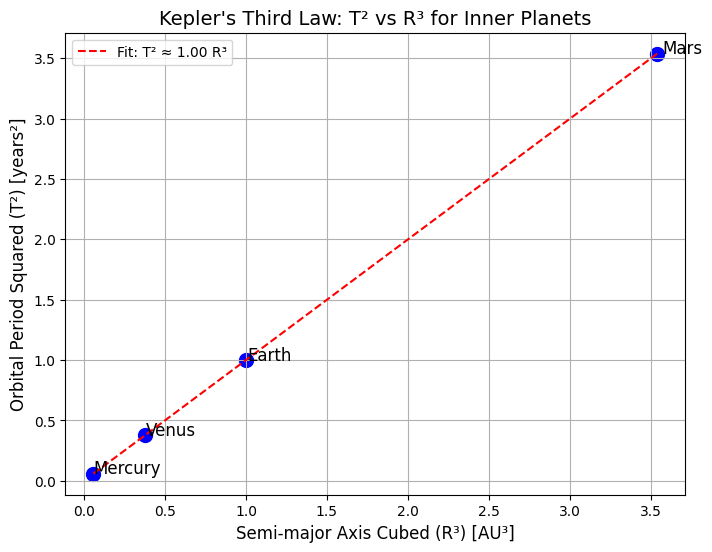

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Planetary data (Semi-major axis R in AU, Orbital period T in years)
planets = {
    'Mercury': {'R': 0.387, 'T': 0.241},
    'Venus':   {'R': 0.723, 'T': 0.615},
    'Earth':   {'R': 1.000, 'T': 1.000},
    'Mars':    {'R': 1.524, 'T': 1.881}
}

# Calculate R^3 and T^2
R_cubed = []
T_squared = []
labels = []

for planet, data in planets.items():
    R = data['R']
    T = data['T']
    R_cubed.append(R**3)
    T_squared.append(T**2)
    labels.append(planet)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(R_cubed, T_squared, color='blue', s=100) # s is marker size

# Add labels for each planet
for i, label in enumerate(labels):
    plt.text(R_cubed[i] * 1.01, T_squared[i], label, fontsize=12) # Offset labels slightly

# Add titles and axis labels
plt.title("Kepler's Third Law: T² vs R³ for Inner Planets", fontsize=14)
plt.xlabel("Semi-major Axis Cubed (R³) [AU³]", fontsize=12)
plt.ylabel("Orbital Period Squared (T²) [years²]", fontsize=12)

# Add grid for better readability
plt.grid(True)

# Optionally: Fit a line to show the proportionality (T^2 = k * R^3)
# For AU and years, the constant k is approximately 1 for objects orbiting the Sun
fit_k = np.polyfit(R_cubed, T_squared, 1) # Fit a first-degree polynomial (line)
k = fit_k[0] # The slope is our constant k
fit_line = np.poly1d(fit_k)
plt.plot(R_cubed, fit_line(R_cubed), 'r--', label=f'Fit: T² ≈ {k:.2f} R³')
plt.legend()

# Show the plot
plt.show()